In [31]:
import numpy as np

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import seml.database as db_utils
from pathlib import Path

import torch

from itertools import product

from statsmodels.stats.proportion import proportion_confint

import pandas as pd

import os

import sys
sys.path.append('..')
from utils import load_results, plot_results_dict

#%matplotlib inline

In [32]:
collection = 'equivariance_force_fields_cert_rebuttal'


jk_config = {
    'username': 'your-username',
    'password': 'your-password',
    'host': 'your-host-address',
    'port': 27017,
    'db_name': 'your-dbname'
}

col = db_utils.get_collection(collection, mongodb_config=jk_config)

In [33]:
def get_experiments(col, restrictions={}):
    
    restrictions['status'] = 'COMPLETED'

    if col.count_documents(restrictions) == 0:
        raise ValueError('No matches!')

    exps = col.find(restrictions, {'config':1, 'result': 1, '_id': 1})
    
    return exps

In [34]:
def get_certificates(raw_results_file):
    raw_results = torch.load(raw_results_file)

    budgets = raw_results['budgets'][0]
    assert torch.all(budgets == torch.stack(raw_results['budgets'], dim=0))

    average_error = np.mean(raw_results['pred_errors'])
    n_abstains = np.sum(raw_results['abstains'])
    max_rad = raw_results['max_rad']
    n_molecules = len(raw_results['certified_output_distances'])

    average_certified_output_distances = None

    for abstain, dists in zip(raw_results['abstains'], raw_results['certified_output_distances']):
        if abstain:
            continue
        else:
            if average_certified_output_distances is None:
                average_certified_output_distances = dists / (n_molecules - n_abstains)
            else:
                average_certified_output_distances += dists / (n_molecules - n_abstains)

    return {
        'average_error': average_error,
        'n_abstains': n_abstains,
        'max_rad': max_rad,
        'budgets': budgets.numpy(),
        'average_certified_output_distances': average_certified_output_distances.numpy()
    }

In [35]:
def generate_exp_result_dict(exp):

    result_dict = {}

    result_dict['dataset'] = exp['config']['dataset']
    result_dict['seed'] = exp['config']['train_loading']['restrictions']['model_seed']

    result_dict['target'] = exp['config']['target']
    result_dict['std'] = exp['config']['smoothing_params']['std']
    result_dict['delta'] = exp['config']['smoothing_params']['delta']

    result_dict['raw_results_file'] = exp['result']['save_file']

    cert_dict = get_certificates(result_dict['raw_results_file'])

    result_dict.update(cert_dict)

    return result_dict

In [36]:
# Use commented out code if you want to use your own data
#experiments = get_experiments(col, restrictions={'config.n_molecules': 1000, 'config.model_name': 'spherenet'})
#results = load_results(
#            generate_exp_result_dict,
#            experiments,
#            results_file='./raw_data_spherenet',
#            #overwrite=False
#            )

results = load_results(
            generate_exp_result_dict,
            None,
            results_file='./raw_data_spherenet',
            overwrite=False
            )

In [37]:
results

,dataset,seed,target,std,delta,raw_results_file,average_error,n_abstains,max_rad,budgets,average_certified_output_distances
0,MD17,0,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.871015,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.7704144, 0.770684, 0.77095866, 0.77122..."
1,MD17,1,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.209159,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.93864745, 0.93891424, 0.93918175, 0.93..."
2,MD17,1,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.512509,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.36080217, 0.3609282, 0.3610551, 0.3611..."
3,MD17,1,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.521157,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.40701485, 0.40715098, 0.40728068, 0.40..."
4,MD17,1,toluene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.615757,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.5393697, 0.5395439, 0.53972346, 0.5399..."
5,MD17,1,salicylic acid,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.085480,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.72716326, 0.7274148, 0.7276591, 0.7279..."
6,MD17,2,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.453037,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.35958004, 0.3597088, 0.3598423, 0.3599..."
7,MD17,2,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.601722,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.4494638, 0.44961712, 0.44977146, 0.449..."
8,MD17,3,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.882480,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.67895406, 0.67920154, 0.6794502, 0.679..."
9,MD17,3,ethanol,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.648222,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.65400374, 0.65424925, 0.6544937, 0.654..."


In [38]:
res = results.loc[results['std'] == 0.00001]
res

,dataset,seed,target,std,delta,raw_results_file,average_error,n_abstains,max_rad,budgets,average_certified_output_distances
0,MD17,0,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.871015,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.7704144, 0.770684, 0.77095866, 0.77122..."
1,MD17,1,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.209159,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.93864745, 0.93891424, 0.93918175, 0.93..."
2,MD17,1,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.512509,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.36080217, 0.3609282, 0.3610551, 0.3611..."
3,MD17,1,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.521157,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.40701485, 0.40715098, 0.40728068, 0.40..."
4,MD17,1,toluene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.615757,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.5393697, 0.5395439, 0.53972346, 0.5399..."
5,MD17,1,salicylic acid,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.085480,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.72716326, 0.7274148, 0.7276591, 0.7279..."
6,MD17,2,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.453037,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.35958004, 0.3597088, 0.3598423, 0.3599..."
7,MD17,2,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.601722,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.4494638, 0.44961712, 0.44977146, 0.449..."
8,MD17,3,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.882480,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.67895406, 0.67920154, 0.6794502, 0.679..."
9,MD17,3,ethanol,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.648222,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.65400374, 0.65424925, 0.6544937, 0.654..."


In [39]:
res.loc[res['target'] == 'malonaldehyde']['average_certified_output_distances'].mean()[-2]

1.6466

In [40]:
min_factor = 1000000000000000000
max_factor = -10000000000

for i in range(len(res)):
    row = res.iloc[i]
    err = row['average_error']
    min_change, max_change = row['average_certified_output_distances'][[1, -2]]

    min_factor = min(min_factor, err / max_change)
    max_factor = max(max_factor, err / min_change)

print(min_factor)
print(max_factor)

0.5814496802696508
1.628418497004254


In [41]:
results.loc[results['std'] == 0.00001]['average_error'].min()

0.45303694716095927

In [42]:
results.loc[results['std'] == 0.00001]['average_error'].max()

1.40184342238307

In [43]:
def prepare_plot_dict(res, subsampling_factor=10):
    plot_dict = {}

    print(f'Preparing {len(res)} results.')

    for i in range(len(res)):
        row = res.iloc[i]

        if row['target'].capitalize() not in plot_dict:
            plot_dict[row['target'].capitalize()] = {
                'budgets': row['budgets'][:-1][::subsampling_factor],
                'cert_metrics': [row['average_certified_output_distances'][:-1]]
            }
        
        else:
            plot_dict[row['target'].capitalize()]['cert_metrics'].append(row['average_certified_output_distances'][:-1])

    for k in plot_dict.keys():
        plot_dict[k]['errors'] = np.std(plot_dict[k]['cert_metrics'], axis=0)[::10]
        plot_dict[k]['cert_metrics'] = np.mean(plot_dict[k]['cert_metrics'], axis=0)[::10]
        

    return plot_dict

Preparing 40 results.
Max error for Aspirin is 0.09919807314872742
Max error for Uracil is 0.08273221552371979
Max error for Ethanol is 0.07892922312021255
Max error for Benzene is 0.010098413564264774
Max error for Napthalene is 0.10151364654302597
Max error for Toluene is 0.05733245611190796
Max error for Salicylic acid is 0.04452071338891983
Max error for Malonaldehyde is 0.05440778285264969


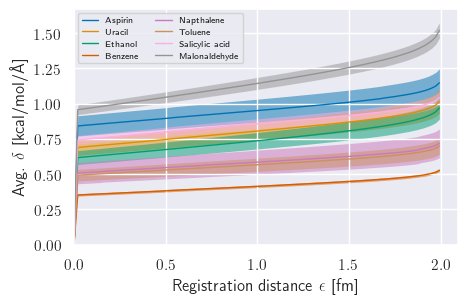

In [44]:
res = results.loc[results['std'] == 0.00001]
plot_dict_00001 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plot_dict_00001, 'Registration distance $\epsilon$ [fm]', 'Avg. $\delta$ [kcal/mol/Å] ', legend_params={'ncols': 2, 'fontsize': 6}, clip_on=True, zorder=None, budget_scaling=10**5,
                    keys=['Aspirin', 'Uracil', 'Ethanol', 'Benzene', 'Napthalene', 'Toluene', 'Salicylic acid', 'Malonaldehyde'])


In [45]:
list(plot_dict_00001.keys())

['Uracil',
 'Aspirin',
 'Benzene',
 'Napthalene',
 'Toluene',
 'Salicylic acid',
 'Ethanol',
 'Malonaldehyde']